In [1]:
#from fdcurves_manual visualization notebook
import numpy as np
import scipy as sc
from scipy import stats
import matplotlib.pyplot as plt
from lumicks import pylake
%matplotlib inline

#things i need
import glob
import re


In [2]:
dire='/mnt/e/Olivia files/LAB/PROJECTS/C-trap things/190906 ssDNA RPA-DBD/'
files = glob.glob(dire+'*Scan*.h5')
for file_name in files:
    #print(file_name)
    file = pylake.File(file_name)
    #print(file)
    key = list(file.scans.keys())[0]
    print(key,end =" ")

k1=input("which is pull? ")

for f in files:
    if re.search(r'\s' + k1+'\.',f):
        filename1=f
        print('opening1 '+filename1)

file1 = pylake.File(filename1)


which is pull? 


NameError: name 'filename1' is not defined

In [19]:
forcex = file1['Force HF']['Force 1x']
time = forcex.timestamps/1e9
time = time - time[0]
sample_rate = forcex.sample_rate
downsampled_rate = 100 # Hz
# downsample the force, nanostage position and time
forcex_downsamp = forcex.downsampled_by(int(sample_rate/downsampled_rate))
time_downsamp = forcex_downsamp.timestamps/1e9
time_downsamp = time_downsamp - time_downsamp[0]

tim1=time_downsamp
fxd1=forcex_downsamp.data


Text(0,0.5,'Force (pN)')

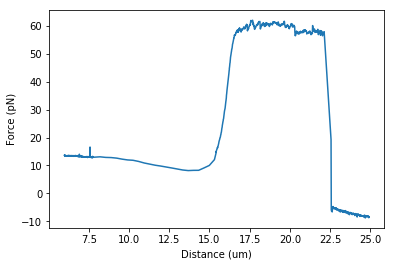

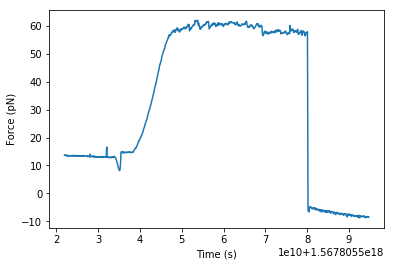

In [34]:
fcx1=file1['Force LF']['Force 1x']
dst1=file1['Distance']['Distance 1']
time1=fcx1.timestamps

plt.figure()
plt.plot(dst1.data,fcx1.data)
plt.xlabel('Distance (um)')
plt.ylabel('Force (pN)')

plt.figure()
plt.plot(time1,fcx1.data)
plt.xlabel('Time (s)')
plt.ylabel('Force (pN)')

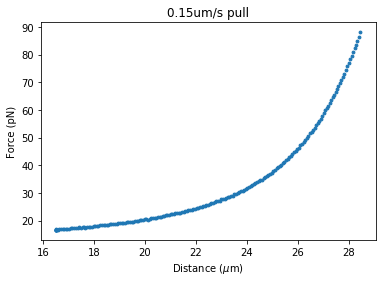

In [20]:
fd1=file1.fdcurves[k1]
plt.figure()
#plt.subplot(211)
fd1.plot_scatter()
plt.title('0.15um/s pull')
#plt.subplot(212)
#fd2.plot_scatter(color='orange')

# Remove horizontal space between axes
#plt.subplots_adjust(hspace=0)
#plt.title('')

#save
plt.savefig(dire+'FDcurves'+k1+'.png')